In [141]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [173]:
data = pd.read_csv("data/boston_2023_spatial.csv")

In [174]:
data.describe()

,living_area,sale_price,price_per_sf,street_no,total_room_num,bedrooms,bathrooms,half_bathrooms,kitchens,fireplaces,...,NEAR_DIST_University,NEAR_DIST_Security,NEAR_DIST_Subway,NEAR_DIST_Culture,NEAR_DIST_Culture_District,COUNT_NEAR_FID_1,NEAR_COUNT_Schools,NEAR_COUNT_Bus,NEAR_COUNT_Trees,NEAR_COUNT_Restaurants
count,3161.000000,3.161000e+03,3161.000000,3161.000000,3160.000000,3161.000000,3161.000000,3157.000000,3161.000000,3157.000000,...,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,2201.000000,3161.000000,3161.000000,3161.000000,3161.000000
mean,1575.427396,8.174183e+05,584.835432,223.192977,6.495570,3.049668,1.799114,0.266075,1.251819,0.316440,...,1982.559532,1206.950588,1379.168625,1454.755118,2228.574767,6.929577,4.825055,4.375514,31.680797,4.850680
std,892.737233,3.740535e+05,196.566837,537.483800,3.506063,1.892624,0.876457,0.473806,0.593624,0.631572,...,1038.999708,603.740681,879.180851,939.022443,1546.597876,5.936026,5.889764,3.052560,25.193271,8.944546
min,335.000000,2.000000e+05,136.190000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,17.687316,43.635551,60.753072,15.271659,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,974.000000,5.899990e+05,436.050000,24.000000,4.000000,2.000000,1.000000,0.000000,1.000000,0.000000,...,1277.333180,734.677129,742.030992,720.622857,980.061067,2.000000,0.000000,2.000000,15.000000,0.000000
50%,1280.000000,7.450000e+05,573.090000,63.000000,5.000000,3.000000,2.000000,0.000000,1.000000,0.000000,...,1939.412614,1140.048887,1224.820085,1260.410297,2017.292866,5.000000,2.000000,4.000000,26.000000,2.000000
75%,1938.000000,9.450000e+05,726.870000,187.000000,8.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,2679.415926,1667.259252,1882.139904,2051.470101,3202.023707,11.000000,7.000000,6.000000,40.000000,5.000000
max,8980.000000,7.400000e+06,999.060000,5257.000000,22.000000,14.000000,8.000000,3.000000,4.000000,9.000000,...,5181.372008,3040.582540,5923.486026,4573.247163,7594.281564,28.000000,28.000000,16.000000,176.000000,84.000000


In [175]:
print(data["sale_price"].isna().sum()) 

0


In [176]:
print(data["living_area"].isna().sum())  

0


In [177]:
# data_21.columns

for col in data.columns:
    print(col)

sale_date
living_area
category
sale_price
parcel
price_per_sf
street_no
street_name
total_room_num
bedrooms
bathrooms
half_bathrooms
kitchens
fireplaces
ac_type
heat_type
interior_condition
parking_spots
year_built
exterior_condition
foundation
full_address
owner_name
owner_property_count
x
y
properties
NEAR_FID
NEAR_DIST_Parks
NEAR_DIST_Health
NEAR_FC
NEAR_DIST_Safety
NEAR_DIST_University
NEAR_DIST_Security
NEAR_DIST_Subway
NEAR_DIST_Culture
NEAR_DIST_Culture_District
COUNT_NEAR_FID_1
NEAR_COUNT_Schools
NEAR_COUNT_Bus
NEAR_COUNT_Trees
NEAR_COUNT_Restaurants


In [178]:
# check the bedroom nan portion
print(data["bedrooms"].isnull().sum() / len(data))

# drop the bedroom nan
# data_21 = data_21.dropna(subset=['BED_RMS'])

# check the bedroom nan portion
# data_21["BED_RMS"].isnull().sum() / len(data_21)



0.0


In [179]:
len(data)

3161

In [180]:
# rename column x and y to Longitude and Latitude
data = data.rename(columns={'x': 'Longitude', 'y': 'Latitude'})


In [181]:
data = pd.get_dummies(data, columns=["category"], drop_first=True)


In [182]:


# categorical columns start with "category"
categorica_columns = [col for col in data.columns if col.startswith("category")]
print(categorica_columns)

# change the categorical columns to integer
data[categorica_columns] = data[categorica_columns].astype(int)


['category_single_family', 'category_three_family', 'category_two_family']


In [183]:
# Cehck any null among x_columns
X_common = ["bedrooms",\
            "living_area",\
            "Longitude",\
            "Latitude",\
            "NEAR_DIST_Parks",\
            "NEAR_DIST_Health",\
            "NEAR_DIST_Safety",\
            "NEAR_DIST_University",\
            "NEAR_DIST_Security",\
            "NEAR_DIST_Subway",\
            "NEAR_COUNT_Schools",\
            "NEAR_COUNT_Bus",\
            "NEAR_COUNT_Trees",\
            "NEAR_COUNT_Restaurants"]
culture_column = ["NEAR_DIST_Culture"]
culture_district_column = ["NEAR_DIST_Culture_District"]

# Remove Living Area NaN values
# data = data[data["LIVING_AREA"].notna()]
X1_cols = X_common + culture_column
X2_cols = X_common + culture_district_column

X_columns_null = [col for col in X1_cols if data[col].isnull().any()]
print(X_columns_null)

# fill in the null values with 0
data[X_columns_null] = data[X_columns_null].fillna(0)


[]


In [184]:
X1_cols

['bedrooms',
 'living_area',
 'Longitude',
 'Latitude',
 'NEAR_DIST_Parks',
 'NEAR_DIST_Health',
 'NEAR_DIST_Safety',
 'NEAR_DIST_University',
 'NEAR_DIST_Security',
 'NEAR_DIST_Subway',
 'NEAR_COUNT_Schools',
 'NEAR_COUNT_Bus',
 'NEAR_COUNT_Trees',
 'NEAR_COUNT_Restaurants',
 'NEAR_DIST_Culture']

In [107]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
import shap
from sklearn.utils import resample
from sklearn.metrics import r2_score
from tqdm.auto import trange   # progress bar

def bootstrap_xgb(X, y, B=300, random_state=0):
    rng = np.random.RandomState(random_state)
    n = len(y)
    r2_scores = np.empty(B)
    shap_means = np.zeros((B, X.shape[1]))  # mean |ϕ| per feature

    model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.03,
        max_depth=8,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
    )

    for b in trange(B, desc="Bootstrapping"):
        # ----- 1. sample with replacement -----
        idx_boot = rng.choice(n, size=n, replace=True)
        idx_oob  = np.setdiff1d(np.arange(n), idx_boot)
        X_boot, y_boot = X.iloc[idx_boot], y.iloc[idx_boot]
        X_oob,  y_oob  = X.iloc[idx_oob],  y.iloc[idx_oob]

        # ----- 2. fit -----
        model.fit(X_boot, y_boot)

        # ----- 3. evaluate R² on OOB -----
        y_pred = model.predict(X_oob)
        r2_scores[b] = r2_score(y_oob, y_pred)

        # ----- 4. SHAP on OOB (TreeExplainer is fast) -----
        explainer = shap.TreeExplainer(model, feature_perturbation="tree_path_dependent")
        shap_vals = explainer.shap_values(X_oob, check_additivity=False)
        shap_means[b] = np.abs(shap_vals).mean(axis=0)

    return r2_scores, shap_means, X.columns


# ---------- run for the two specs ----------
Y = data["sale_price"]

r2_a, shap_a, feat_a = bootstrap_xgb(data[X1_cols], Y, B=300, random_state=1)
r2_b, shap_b, feat_b = bootstrap_xgb(data[X2_cols], Y, B=300, random_state=1)

# delta distribution
delta_r2 = r2_b - r2_a
mean_delta = delta_r2.mean()
ci_delta   = np.percentile(delta_r2, [2.5, 97.5])
p_value    = np.mean(delta_r2 <= 0)

print(f"ΔR² mean = {mean_delta:.4f}, 95% CI [{ci_delta[0]:.4f}, {ci_delta[1]:.4f}], p = {p_value:.3f}")

Bootstrapping:   0%|          | 0/300 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [99]:
print(r2_a)
print(r2_b)

[0.79123861 0.7661137  0.70279604 0.78383589 0.7325393  0.70572406
 0.68666089 0.73164243 0.71615708 0.70871389 0.76516509 0.74000359
 0.7774173  0.6869992  0.74179077 0.71921766 0.70475709 0.67893326
 0.68755138 0.72531569 0.69617116 0.76965225 0.5992825  0.73432386
 0.78261513 0.72419184 0.6885438  0.74123204 0.74459624 0.73627579
 0.77229291 0.77806187 0.7084775  0.78327978 0.7721014  0.74526644
 0.64787149 0.72015119 0.77938163 0.71695483 0.76298463 0.72770059
 0.68936682 0.75594914 0.77722859 0.72517705 0.75730431 0.76964831
 0.73640668 0.77652138 0.69379926 0.71651149 0.70803773 0.77148801
 0.71742308 0.75852418 0.69570559 0.68132722 0.6894747  0.63772029
 0.69167614 0.76301891 0.71048313 0.78445482 0.76092219 0.7711817
 0.7632944  0.7711032  0.74819362 0.698511   0.7961086  0.7396515
 0.7336514  0.72556102 0.77500272 0.68346429 0.79991388 0.77632052
 0.66826177 0.79354048 0.74630749 0.6768927  0.78196669 0.68419933
 0.69422317 0.69905084 0.77808595 0.67943919 0.7486518  0.719374

In [185]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold



# create a model to predict the real increase percent
Y = data["sale_price"]
X1 = data[X1_cols]

# Initialize model with same parameters
model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.03,
        max_depth=8,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
    )

# model = XGBRegressor()


# Perform 5-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X1, Y, cv=kf, scoring='r2')

# Print cross validation results
print("Cross Validation Scores:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")
print(f"\nMean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

# Fit the model on the full dataset to get feature importances
model.fit(X1, Y)

# Print feature importances
print("\nFeature importances:")
print(model.feature_importances_)


Cross Validation Scores:
Fold 1: 0.8057
Fold 2: 0.8144
Fold 3: 0.7098
Fold 4: 0.6763
Fold 5: 0.7751

Mean CV Score: 0.7563
Standard Deviation: 0.0543

Feature importances:
[0.06928547 0.19165511 0.04684579 0.1499439  0.01733604 0.0225577
 0.03963224 0.10277564 0.03139545 0.04876989 0.04790439 0.02278702
 0.02426248 0.06204711 0.12280169]


In [186]:
# Get feature importances from XGBoost model
importances = model.feature_importances_

# Create dictionary mapping features to their importance scores
importance_dict = dict(zip(X1.columns, importances))

# Print feature importances in order
print("Feature Importances:")
for feature, importance in sorted(importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")


Feature Importances:
living_area: 0.1917
Latitude: 0.1499
NEAR_DIST_Culture: 0.1228
NEAR_DIST_University: 0.1028
bedrooms: 0.0693
NEAR_COUNT_Restaurants: 0.0620
NEAR_DIST_Subway: 0.0488
NEAR_COUNT_Schools: 0.0479
Longitude: 0.0468
NEAR_DIST_Safety: 0.0396
NEAR_DIST_Security: 0.0314
NEAR_COUNT_Trees: 0.0243
NEAR_COUNT_Bus: 0.0228
NEAR_DIST_Health: 0.0226
NEAR_DIST_Parks: 0.0173


In [187]:
print(data[X1.columns].isnull().sum())

bedrooms                  0
living_area               0
Longitude                 0
Latitude                  0
NEAR_DIST_Parks           0
NEAR_DIST_Health          0
NEAR_DIST_Safety          0
NEAR_DIST_University      0
NEAR_DIST_Security        0
NEAR_DIST_Subway          0
NEAR_COUNT_Schools        0
NEAR_COUNT_Bus            0
NEAR_COUNT_Trees          0
NEAR_COUNT_Restaurants    0
NEAR_DIST_Culture         0
dtype: int64


100%|===================| 3160/3161 [01:14<00:00]        

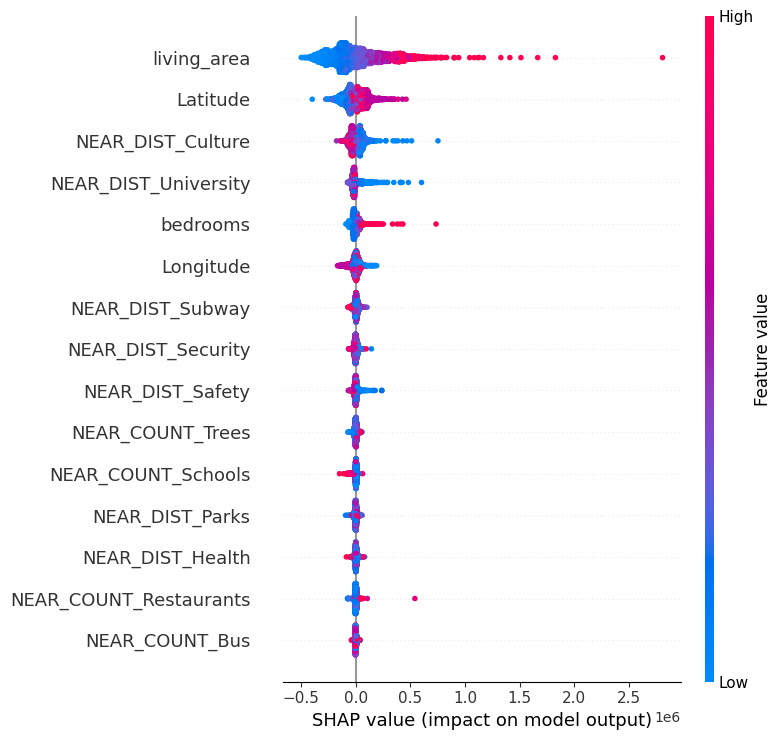

In [188]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP explainer
explainer = shap.Explainer(model, X1)

# Calculate SHAP values
shap_values1 = explainer(X1)

# Create SHAP summary plot
shap.summary_plot(shap_values1, X1)  # You can use "bar" for bar plot


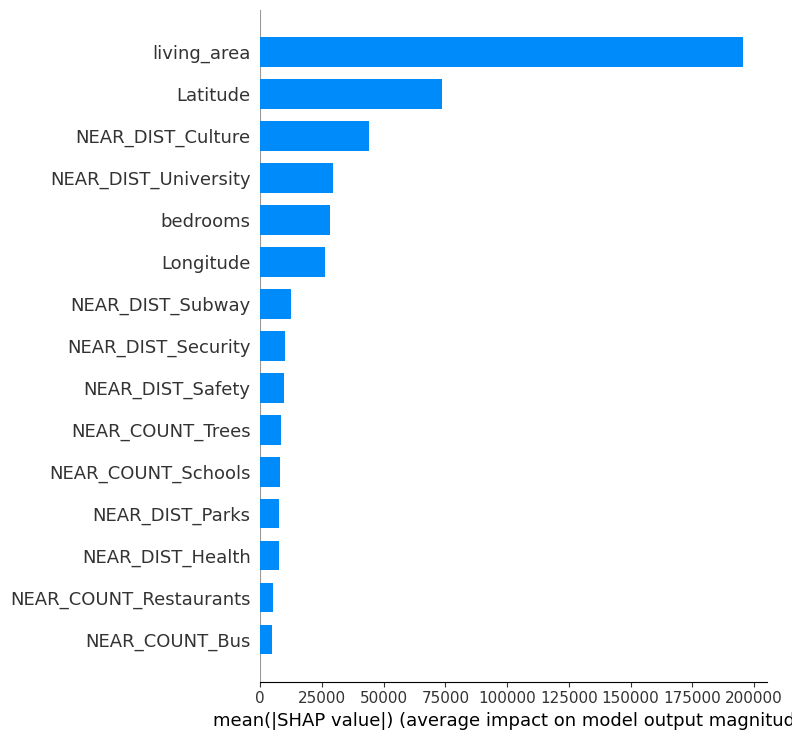

In [189]:
# plot a bar chart of the feature importances

shap.summary_plot(shap_values1, X1, plot_type="bar")

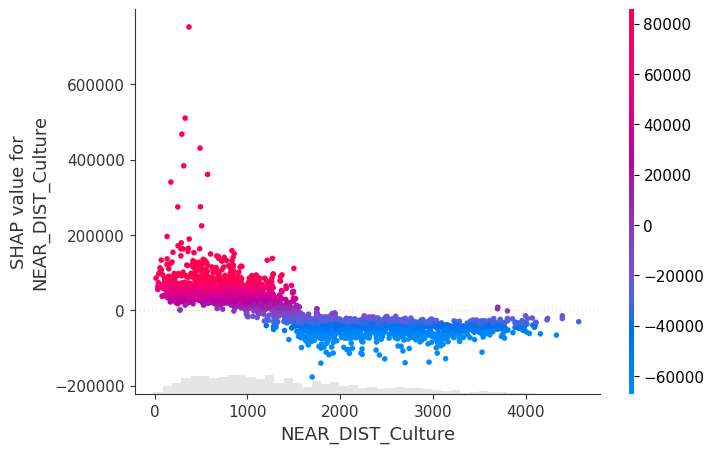

In [190]:
shap.plots.scatter(
    shap_values1[:, "NEAR_DIST_Culture"],
    color=shap_values1[:, "NEAR_DIST_Culture"].values,  # SHAP values as color
)

In [191]:
shap_df = pd.DataFrame(shap_values1.values, columns=X1.columns)
# save df
shap_df.to_csv('data/shap_values.csv', index=False)


In [192]:
len(data)

3161

In [193]:
# now we do with the mixed culture district
X2 = data[X2_cols]

# Initialize model with same parameters
# model = XGBRegressor()

model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.03,
        max_depth=8,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
    )


# Perform 5-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X2, Y, cv=kf, scoring='r2')

# Print cross validation results
print("Cross Validation Scores:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")
print(f"\nMean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

# Fit the model on the full dataset to get feature importances
model.fit(X2, Y)

# Print feature importances
print("\nFeature importances:")
print(model.feature_importances_)

Cross Validation Scores:
Fold 1: 0.8179
Fold 2: 0.7993
Fold 3: 0.7213
Fold 4: 0.6932
Fold 5: 0.7622

Mean CV Score: 0.7588
Standard Deviation: 0.0466

Feature importances:
[0.06944147 0.19047524 0.04958703 0.15318948 0.01717404 0.01862724
 0.03398324 0.06941333 0.02373845 0.04552611 0.0426124  0.02027778
 0.02036722 0.05890822 0.18667865]


In [194]:
# Get feature importances from XGBoost model
importances = model.feature_importances_

# Create dictionary mapping features to their importance scores
importance_dict = dict(zip(X2.columns, importances))

# Print feature importances in order
print("Feature Importances:")
for feature, importance in sorted(importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")


Feature Importances:
living_area: 0.1905
NEAR_DIST_Culture_District: 0.1867
Latitude: 0.1532
bedrooms: 0.0694
NEAR_DIST_University: 0.0694
NEAR_COUNT_Restaurants: 0.0589
Longitude: 0.0496
NEAR_DIST_Subway: 0.0455
NEAR_COUNT_Schools: 0.0426
NEAR_DIST_Safety: 0.0340
NEAR_DIST_Security: 0.0237
NEAR_COUNT_Trees: 0.0204
NEAR_COUNT_Bus: 0.0203
NEAR_DIST_Health: 0.0186
NEAR_DIST_Parks: 0.0172


 99%|===================| 3141/3161 [01:12<00:00]        

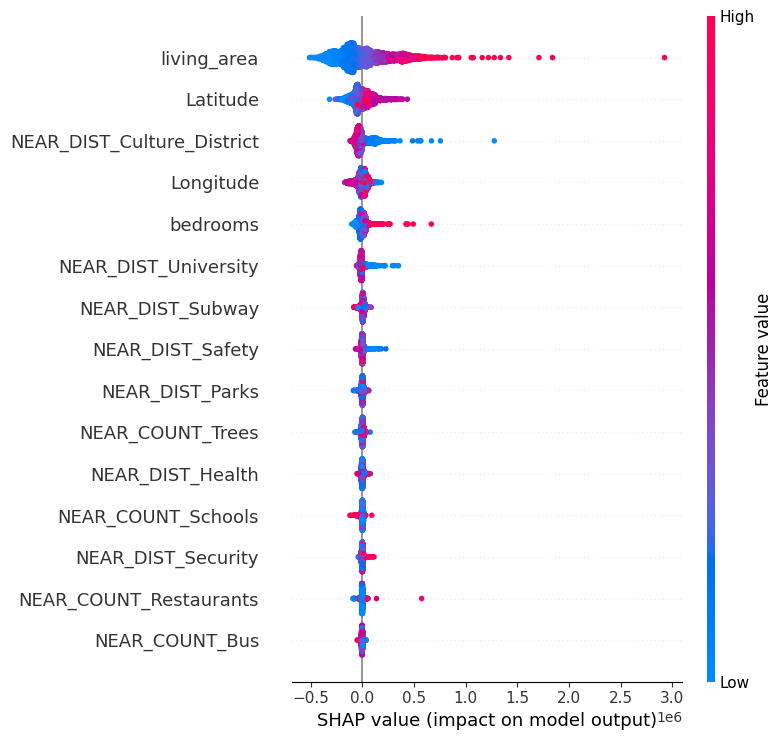

In [195]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP explainer
explainer = shap.Explainer(model, X2)

# Calculate SHAP values
shap_values2 = explainer(X2)

# Create SHAP summary plot
shap.summary_plot(shap_values2, X2)  # You can use "bar" for bar plot


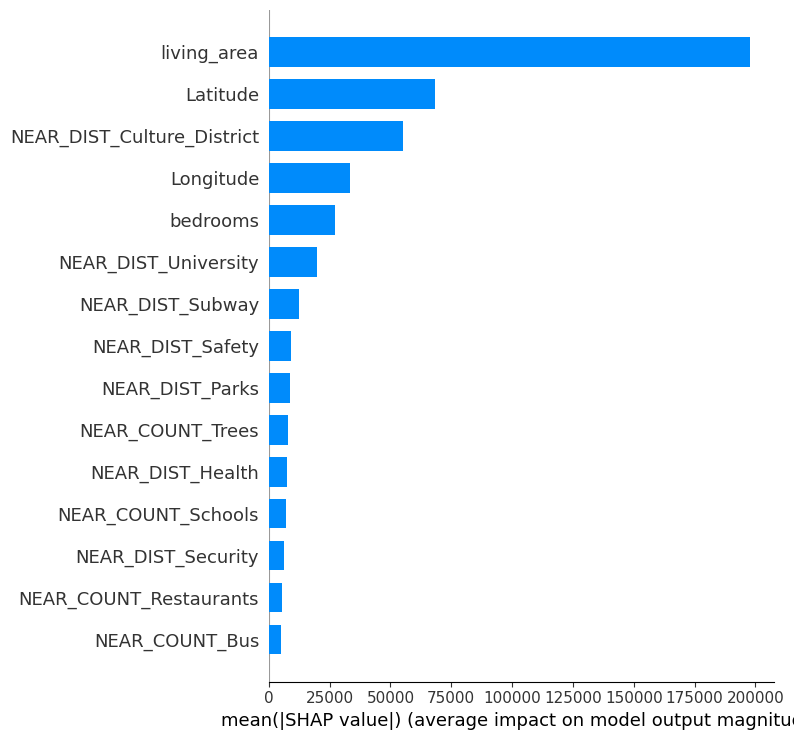

In [196]:
# plot a bar chart of the feature importances

shap.summary_plot(shap_values2, X2, plot_type="bar")

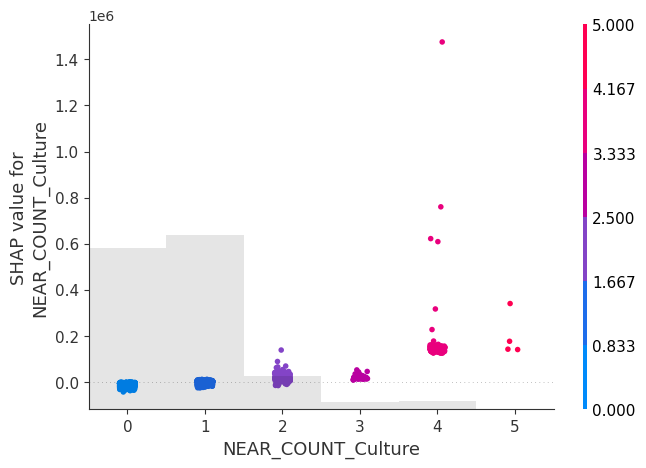

In [166]:
shap.plots.scatter(shap_values2[:, "NEAR_COUNT_Culture"],
                   color=X2["NEAR_COUNT_Culture"].values)

In [126]:
X_common

['bedrooms',
 'living_area',
 'Longitude',
 'Latitude',
 'NEAR_DIST_Parks',
 'NEAR_DIST_Health',
 'NEAR_DIST_Safety',
 'NEAR_DIST_University',
 'NEAR_DIST_Security',
 'NEAR_DIST_Subway',
 'NEAR_COUNT_Schools',
 'NEAR_COUNT_Bus',
 'NEAR_COUNT_Trees']

In [45]:
all_x = X_common + ["NEAR_DIST_Culture", "NEAR_DIST_Culture_District"]

# now we do with all the data
X = data[all_x]

# Initialize model with same parameters
model = XGBRegressor()


# Perform 5-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, Y, cv=kf, scoring='r2')

# Print cross validation results
print("Cross Validation Scores:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")
print(f"\nMean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

# Fit the model on the full dataset to get feature importances
model.fit(X, Y)

# Print feature importances
print("\nFeature importances:")
print(model.feature_importances_)

Cross Validation Scores:
Fold 1: 0.4637
Fold 2: 0.3671
Fold 3: 0.3309
Fold 4: 0.4191
Fold 5: 0.2842

Mean CV Score: 0.3730
Standard Deviation: 0.0633

Feature importances:
[0.05825448 0.05414545 0.02803902 0.04759371 0.0369596  0.02952042
 0.02624639 0.0394957  0.04015504 0.02289393 0.02368708 0.43998384
 0.05270435 0.05377636 0.04654453]


In [46]:
# Get feature importances from XGBoost model
importances = model.feature_importances_

# Create dictionary mapping features to their importance scores
importance_dict = dict(zip(X.columns, importances))

# Print feature importances in order
print("Feature Importances:")
for feature, importance in sorted(importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")


Feature Importances:
Latitude: 0.4400
GROSS_AREA: 0.0583
BED_RMS: 0.0541
NEAR_DIST_Culture: 0.0538
Longitude: 0.0527
NEAR_DIST_Health: 0.0476
NEAR_DIST_Mixed_Culture_District: 0.0465
NEAR_DIST_University: 0.0402
NEAR_DIST_Subway: 0.0395
NEAR_DIST_Park: 0.0370
NEAR_DIST_Safety: 0.0295
BUS_CNT: 0.0280
NEAR_DIST_Security: 0.0262
TREE_CNT: 0.0237
SCHOOL_CNT: 0.0229


100%|===================| 119727/120158 [02:50<00:00]        

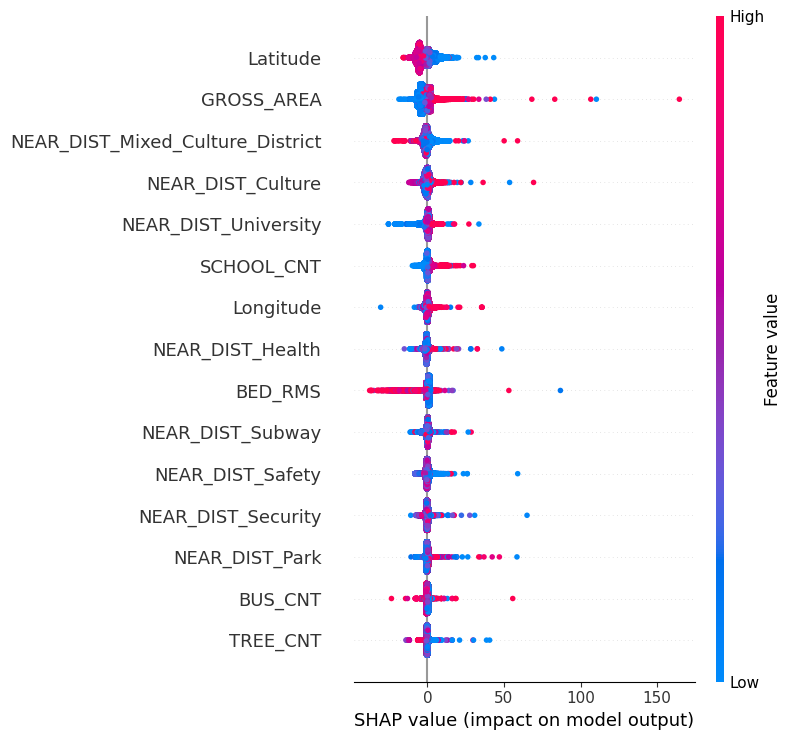

In [47]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP explainer
explainer = shap.Explainer(model, X)

# Calculate SHAP values
shap_values = explainer(X)

# Create SHAP summary plot
shap.summary_plot(shap_values, X)  # You can use "bar" for bar plot


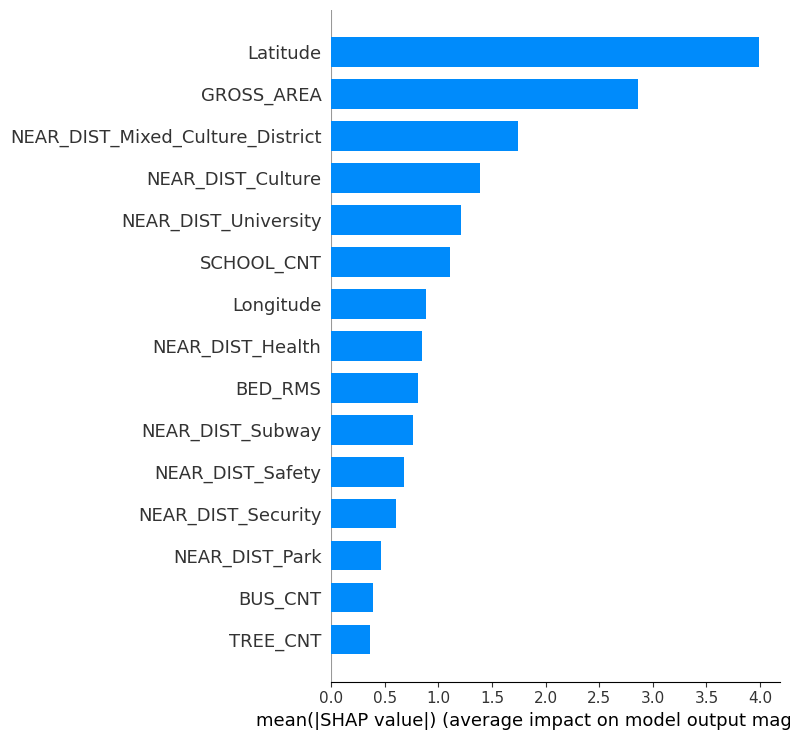

In [48]:
# plot a bar chart of the feature importances

shap.summary_plot(shap_values, X, plot_type="bar")